# Pasos inicales, configuracion del entorno

In [ ]:
# %pip install -r requirements.txt

# Analisis UNA Serie Temporal

## Importacion de Datos
De momento hay que pegar el excel con los datos en la carpeta `data/`

TODO:
- Pendiente gestion de los paths entre windows y linux

In [ ]:
# import src.importacion as importar
# ruta_archivo_a_importar = r"C:\Users\bogdan.stefan\Downloads\ppt_traspaso.pptx"
# importar.copiar_archivo(ruta_archivo_a_importar)

## Uso modelo

### Calculo tablas
 Analisis de una unica serie

In [1]:
import src.analisis_modelizacion as modelo
import numpy as np
import os

# Parametros a cumplimentar
ruta_del_archivo = './data/datos-2.xlsx'
hoja_excel = 'eurostock50'
cantidad_datos = 200

calibre_nodos = 0.0015          # Valor para discriminar NODOS  (val_p)
grupo_volatilidad = 20          # Valor a agrupar volatilidad 
grupo_entropia = 25             # Valor a agrupar la entropia

val_agrupacion = 25             # Valor para agrupar los datos en paquetes (val_r)
ind_agrupacion = 0              # 0 indica que val_r es el num de elementos de cada subgrupo, 
                                # 1 indica que val_r es el num de subgrupos. 

os.environ['nombre_evento'] = hoja_excel
# Instanciamos los datos como eventos
eve = modelo.evento(data_or_path=ruta_del_archivo, 
                    hoja=hoja_excel, 
                    numero_registros=cantidad_datos)
# print("evento:\n", eve)

# # Generamos la Serie X del evento se puede hacer de dos formas:
# #     1. Con la ruta del excel    
# tabla_1 = modelo.serie_x(data_or_path=ruta_del_archivo, 
#                          hoja=hoja_excel, 
#                          numero_registros=cantidad_datos, 
#                          val_p=calibre_nodos)

# #     2. Con el evento
tabla_1 = modelo.serie_x(data_or_path=eve, 
                         numero_registros=cantidad_datos, 
                         val_p=calibre_nodos)

tabla_1.volatilidad('value', grupo_volatilidad)
# print('serie_x:\n', tabla_1)
# Metodo para calcular la Serie Y
tabla_2 = tabla_1.nodos()
# print('serie_y:\n', tabla_2)

# # Generamos la Serie Z del evento, al igual qeu la Serie X sepuede hacer de dos formas:
tabla_3 = modelo.serie_z(data_or_path=eve, 
                         numero_registros=cantidad_datos, 
                         val_p=calibre_nodos, 
                         val_r=val_agrupacion, 
                         boton=ind_agrupacion)
# # Creamos en la tabla_3 la columna entropia y le asignamos el valor calculado.
entropia = tabla_1.entropia_shannon(nombre_columna='value', grupo=grupo_entropia)
entropia_global = tabla_1.entropia_shannon('value')
masa = entropia/np.sum(entropia)
# print('entropia:', entropia_global)
tabla_3['entropy'] = entropia
tabla_3['mass'] = masa
print('serie_z:\n', tabla_3, type(tabla_3))

# Exportamos la tabla_3 a .csv por comodidad, no es necesario
tabla_3.to_csv('temp/tablas/serie_z.csv')



serie_z:
         time  range   density  dif density  dif values  velocity   dif vel  \
0 2023-07-20     25  1.000000          NaN         NaN       NaN       NaN   
1 2023-08-25     50  0.952381    -0.047619   -0.034672 -0.033021       NaN   
2 2023-09-29     75  1.000000     0.047619    0.020887  0.020887  0.053908   
3 2023-11-03    100  0.904762    -0.095238   -0.089276 -0.080773 -0.101661   
4 2023-12-08    125  1.000000     0.095238    0.104854  0.104854  0.185627   
5 2024-01-18    150  0.857143    -0.142857   -0.081679 -0.070011 -0.174865   
6 2024-02-22    175  0.904762     0.047619    0.062593  0.056632  0.126643   
7 2024-03-28    200  0.857143    -0.047619    0.005294  0.004538 -0.052094   

   pressure  dif pressure  viscosity  viscosity ABE  subs visco   entropy  \
0       NaN           NaN        NaN            NaN         NaN  4.559361   
1 -0.001038           NaN        NaN            NaN         NaN  4.098515   
2 -0.000436      0.000602        NaN            NaN     

In [1]:
print(np.sum(masa))

NameError: name 'np' is not defined

### Graficar resultados

eurostock50_value 1 5083.42
eurostock50_volatility_20 1 0.20362814854474826
eurostock50_density 1 1.0
eurostock50_pressure 1 -1.764821808140894e-05
eurostock50_subs visco 1 0.0032961746291556796
eurostock50_velocity 1 0.10485397626007686


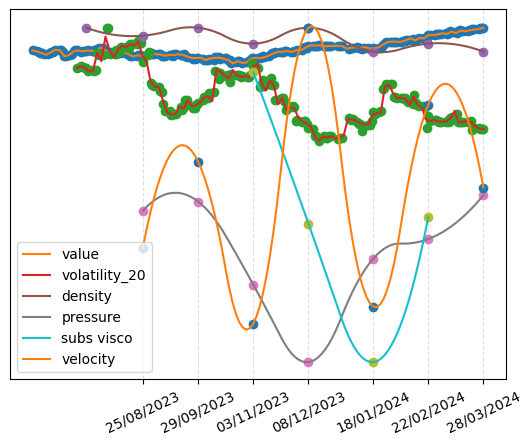

In [2]:
from src.graphic_generator import pinta

# pinta([tabla_1, tabla_3],[['value'],['viscosity', 'viscosity ABE']])
# pinta([tabla_1],[['value']])
# pinta([tabla_1],[['volatility_20']])
# pinta([tabla_3],[['density']])
# pinta([tabla_3],[['density','pressure']])
# pinta([tabla_3],[['subs visco']])
# pinta([tabla_3],[['velocity']])
# pinta([tabla_3],[['viscosity', 'viscosity ABE']])
pinta(tablas=[tabla_1, tabla_3],columnas=[['value','volatility_20'],['density','pressure','subs visco','velocity']])

# Analisis Multivariable

In [6]:
# Cargamos y exportamos las tablas necesarias
import src.analisis_modelizacion as modelo
import numpy as np
import os

# Parametros a cumplimentar
cantidad_datos = 200

calibre_nodos = 0.002           # Valor para discriminar NODOS  (val_p)
val_agrupacion = 25             # Valor para agrupar los datos en paquetes
ind_agrupacion = 0              # 0 indica que val_r es el num de elementos de cada subgrupo, 
                                # 1 indica que val_r es el num de subgrupos. 

grupo_volatilidad = 20          # Valor a agrupar volatilidad 

lista_hojas_eventos = [
                        'ejemplo1_evento1',
                        'ejemplo1_evento2'
                    ]
ruta_del_archivo = './data/multi_variable.xlsx'
lista_masas = np.array([0.0000972430641073838, 0.0000068571])
lista_masas = lista_masas/lista_masas.sum()
for  i, hoja_excel in enumerate(lista_hojas_eventos):
    os.environ['nombre_evento'] = hoja_excel
    # print(ruta_del_archivo, hoja_excel)
    tabla_1 = modelo.serie_x(data_or_path=ruta_del_archivo, 
                            hoja=hoja_excel,
                            numero_registros=cantidad_datos, 
                            val_p=calibre_nodos)
    tabla_1.volatilidad('value', grupo_volatilidad)

    tabla_3 = modelo.serie_z(data_or_path=tabla_1, 
                            numero_registros=cantidad_datos, 
                            val_p=calibre_nodos, 
                            val_r=val_agrupacion, 
                            boton=ind_agrupacion)
    # # Creamos en la tabla_3 la columna entropia y le asignamos el valor calculado.
    entropia = tabla_1.entropia_shannon(nombre_columna='value')[0]
    pressure_mass = np.nanmean(tabla_3['pressure'])
    viscosity_mass = np.nanmean(tabla_3['viscosity'])

    masa = entropia*pressure_mass*viscosity_mass

    tabla_3['mass'] = lista_masas[i]
    
    # tabla_3.drop(columns=['viscosity ABE', 'subs visco'])
    # Exportamos la tabla_3 a .csv por comodidad, no es necesario
    tabla_3.to_csv(f'temp/tablas/{hoja_excel}.csv')
    # print(tabla_3)



In [ ]:
import pandas as pd
evento1 = pd.read_csv('./temp/tablas/ejemplo1_evento1.csv', index_col=0)
evento2 = pd.read_csv('./temp/tablas/ejemplo1_evento2.csv', index_col=0)
print(evento1,'\n',evento2)

# calculo1 = velocidad[i+1]-velocidad[i]+velocidad[i]*(diff_vel[i]/diff_val[i])+velocidad2[i]*(diff_vel[i]/diff_val2[i])